## **Image Classification on Cars196 Dataset**

1. Anuj Sarda - 1814052
2. Jay Panchal - 1814044
3. Dhruv Doshi - 1814002
4. Ritik Shah - 1814050
5. Labdhi Jain - 1814015

**What is Image Classification?**

---


Image classification is where a model can analyse an image and identify the ‘class’ the image falls under. (Or a probability of the image being part of a ‘class’.) A class is essentially a label, for instance, ‘car’, ‘animal’, ‘building’ and so on.


### **1.Mounting Google Drive in the runtime's virtual machine and Importing the required libraries and packages**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import math
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, ReLU, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from keras.callbacks import ModelCheckpoint
from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

BATCH_SIZE = 22

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **2. Data Augmentation on Training Images**
---
Data augmentation is a technique to artificially create new training data from existing training data. It generates variations of the training set images that are likely to be seen by the model.


In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=20,  # Rotate the augmented image by 20 degrees
    zoom_range=0.2,  # Zoom by 20% more or less
    horizontal_flip=True,  # Allow for horizontal flips of augmented images
    brightness_range=[0.8, 1.2],  # Lighter and darker images by 20%
    width_shift_range=0.1,
    height_shift_range=0.1,
    preprocessing_function=preprocess_input
)

### **3. Loading the dataset from Google Drive**
---
We took a subset of the original cars196 dataset. In our subset, there were 22 unique classes, the training data contained 920 images and the testing data contained 902 images.


In [ ]:
img_data_iterator = train_datagen.flow_from_directory(
    # Where to take the data from, the classes are the sub folder names
    '../content/drive/My Drive/PATH_TO_OUTPUT/car_data/train1',
    class_mode="categorical",  # classes are in 2D one hot encoded way, default is true but just to point it out
    shuffle=True,  # shuffle the data, default is true but just to point it out
    batch_size=BATCH_SIZE,
    target_size=(224, 224)
 ) # This size is the default of mobilenet NN

Found 920 images belonging to 22 classes.


In [ ]:
validation_img_data_iterator = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(
    '../content/drive/My Drive/PATH_TO_OUTPUT/car_data/test1',
    class_mode="categorical",
    shuffle=True,
    batch_size=BATCH_SIZE,
    target_size=(224, 224)
)

Found 902 images belonging to 22 classes.


### **4. Displaying Augmented Images**
---
Images of first 9 cars along with their correct labels

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


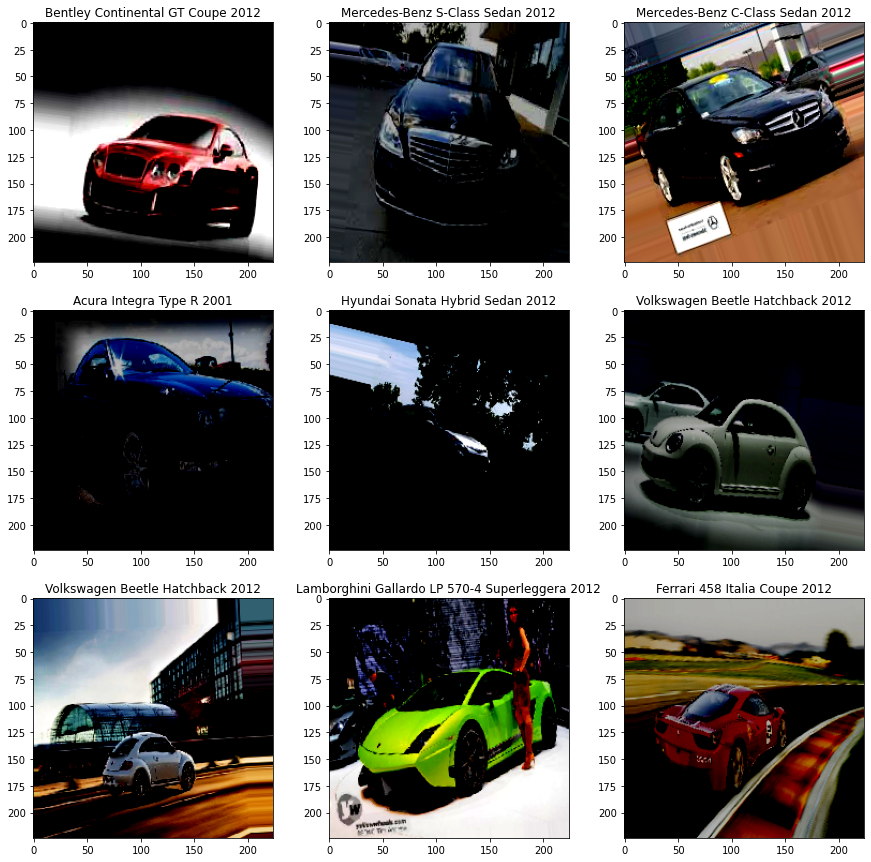

In [ ]:
class_names=['Acura Integra Type R 2001', 'Audi A5 Coupe 2012', 'Audi R8 Coupe 2012', 'BMW 3 Series Sedan 2012', 'BMW 3 Series Wagon 2012', 'Bentley Continental GT Coupe 2012', 'Bentley Continental Supersports Conv. Convertible 2012', 'Bugatti Veyron 16.4 Convertible 2009', 'Bugatti Veyron 16.4 Coupe 2009', 'Chevrolet Camaro Convertible 2012', 'Chevrolet Cobalt SS 2010', 'Ferrari 458 Italia Coupe 2012', 'Hyundai Sonata Hybrid Sedan 2012', 'Hyundai Tucson SUV 2012', 'Jeep Liberty SUV 2012', 'Jeep Patriot SUV 2012', 'Lamborghini Aventador Coupe 2012', 'Lamborghini Gallardo LP 570-4 Superleggera 2012', 'Mercedes-Benz C-Class Sedan 2012', 'Mercedes-Benz S-Class Sedan 2012', 'Volkswagen Beetle Hatchback 2012', 'Volkswagen Golf Hatchback 1991']
plt.figure(figsize=(15,15))
for i,(image_batch,label) in enumerate(img_data_iterator):
    if i==9:
      break
    else:
      ax=plt.subplot(3, 3, i+1)
      plt.title(class_names[np.argmax(label[i])])
      plt.imshow(image_batch[i])

### **5. Building the Model**
---
With the help of the MobileNetV2 neural network, we build the model. In this, we used the GlobalAveragePooling2D layer, the Dense layer, the Dropout, etc. We also used the activation function Relu. We used the softmax function in the output layer.

In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False) #returns a MobileNet-v2 network trained on the ImageNet data set
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
preds = Dense(22, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=preds)

# Disable training of already trained layer
for layer in model.layers[:-3]:
    layer.trainable = False

9412608/9406464 [==============================] - 0s 0us/step


### **Example of Convolved Image of Kernel 3**

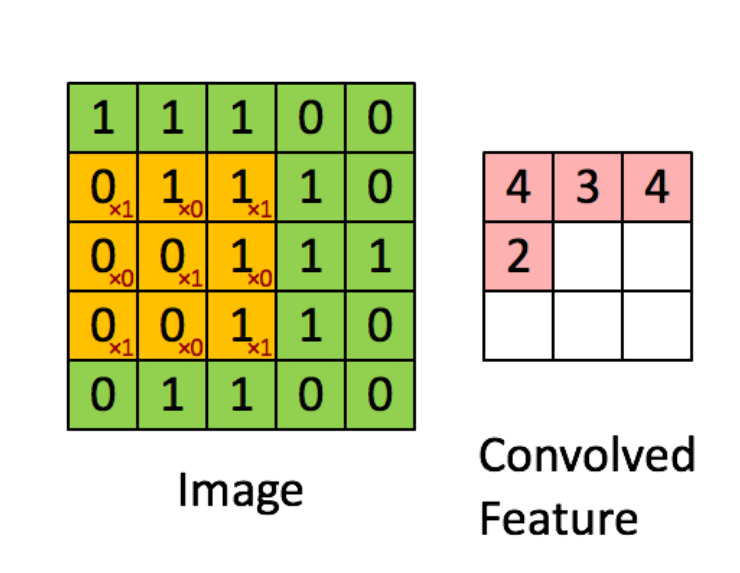

### **Example of Pooling Layer**

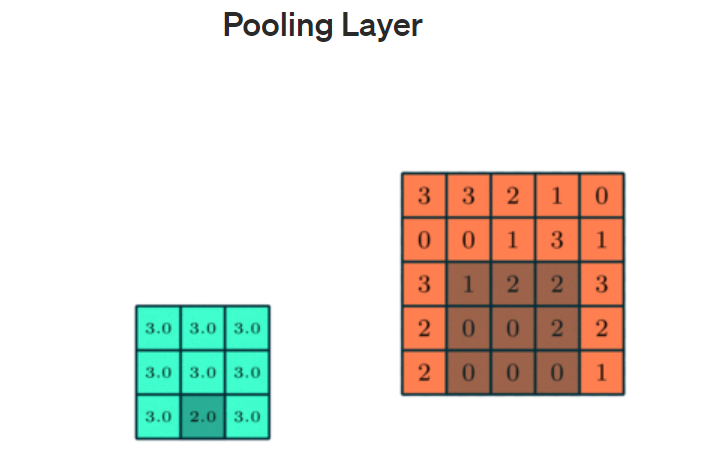

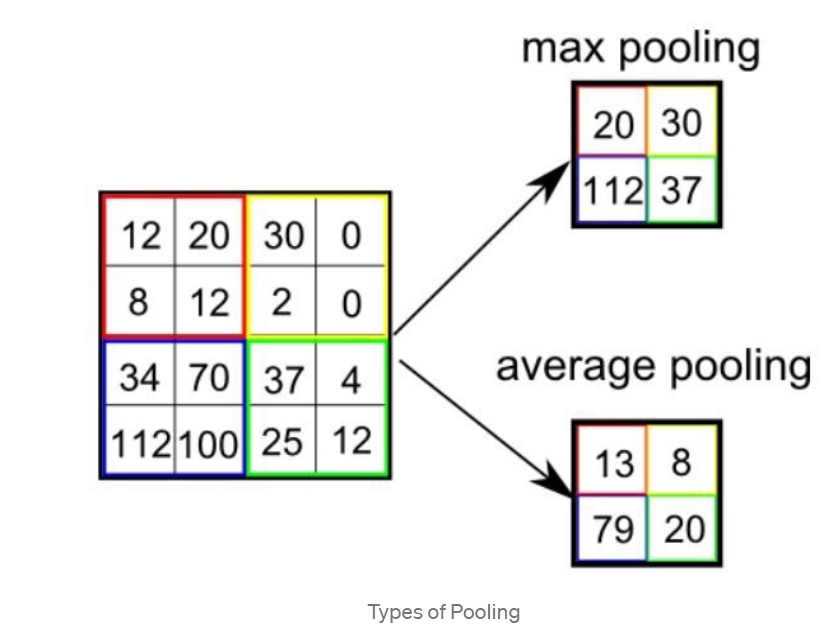

### **6. Compiling the Model**
---
While compiling the model, we used cross entropy which computes the crossentropy loss between the labels and predictions. Cross-entropy loss increases as the predicted probability diverges from the actual label.

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

### **7. Fitting the Training Data**
---
We trained our built model on the training data and we ran this for 100 epochs. This helped increase our training and validation accuracy as well as  minimize the loss

Training Accuracy	--> 94.77%

Validation Accuracy	--> 65.08%



In [ ]:
history = model.fit(
    img_data_iterator,
    steps_per_epoch=math.ceil(920/BATCH_SIZE),  # 8144 is the number of training images
    validation_steps=math.ceil(902/BATCH_SIZE),  # 8062 is the number of validation images
    validation_data=validation_img_data_iterator,
    epochs=100,
    # callbacks=callbacks_list,
)

Epoch 1/100
42/42 [==============================] - 335s 8s/step - loss: 3.2092 - accuracy: 0.1057 - val_loss: 2.1691 - val_accuracy: 0.3858
Epoch 2/100
42/42 [==============================] - 87s 2s/step - loss: 2.1367 - accuracy: 0.3366 - val_loss: 1.7664 - val_accuracy: 0.4856
Epoch 3/100
42/42 [==============================] - 86s 2s/step - loss: 1.7538 - accuracy: 0.4556 - val_loss: 1.5008 - val_accuracy: 0.5831
Epoch 4/100
42/42 [==============================] - 85s 2s/step - loss: 1.5224 - accuracy: 0.5347 - val_loss: 1.4276 - val_accuracy: 0.5898
Epoch 5/100
42/42 [==============================] - 85s 2s/step - loss: 1.3052 - accuracy: 0.6087 - val_loss: 1.3729 - val_accuracy: 0.5754
Epoch 6/100
42/42 [==============================] - 86s 2s/step - loss: 1.1572 - accuracy: 0.6284 - val_loss: 1.3093 - val_accuracy: 0.5920
Epoch 7/100
42/42 [==============================] - 85s 2s/step - loss: 1.0268 - accuracy: 0.6891 - val_loss: 1.2169 - val_accuracy: 0.6164
Epoch 8/100


### **8.Visualize training results**
---
Create plots of loss and accuracy on the training and validation sets.

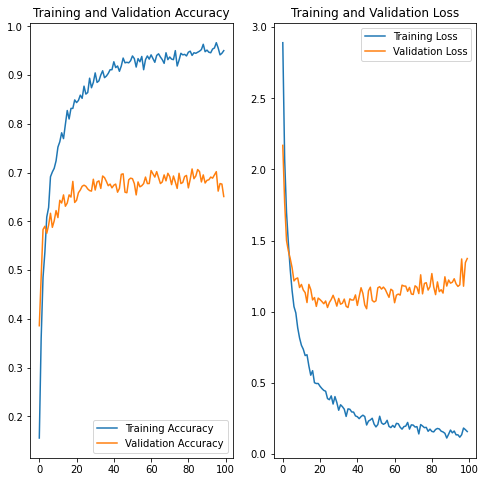

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **9. Predicting the Output Labels**
---
Title displays predicted label and Ylabel displays original label

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


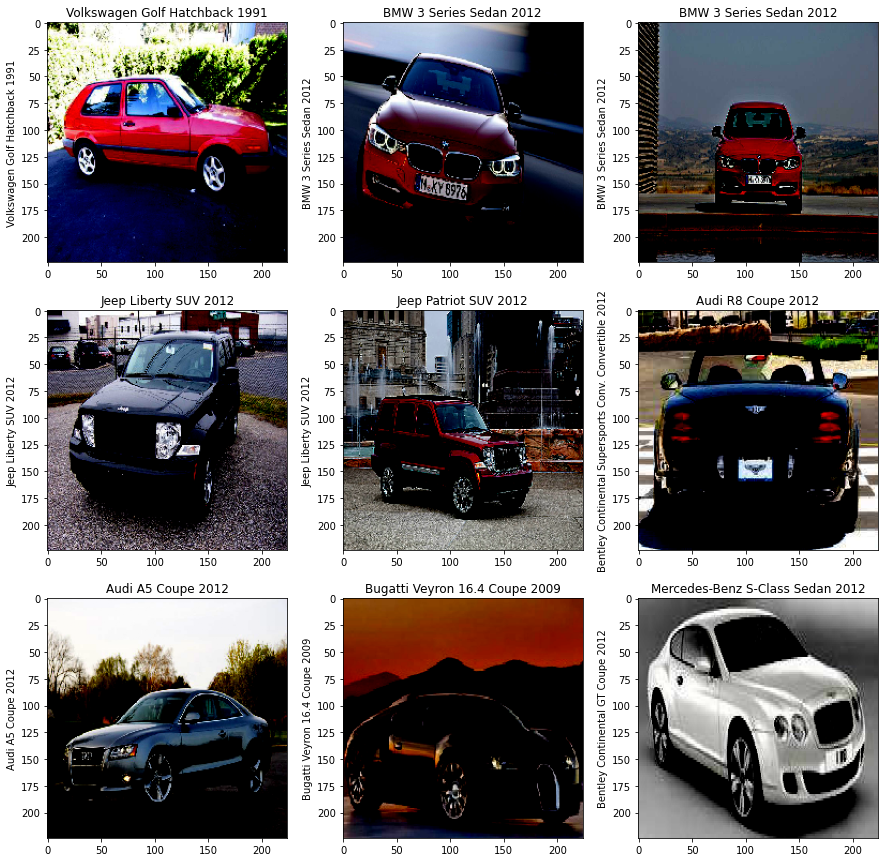

In [ ]:

class_names=['Acura Integra Type R 2001', 'Audi A5 Coupe 2012', 'Audi R8 Coupe 2012', 'BMW 3 Series Sedan 2012', 'BMW 3 Series Wagon 2012', 'Bentley Continental GT Coupe 2012', 'Bentley Continental Supersports Conv. Convertible 2012', 'Bugatti Veyron 16.4 Convertible 2009', 'Bugatti Veyron 16.4 Coupe 2009', 'Chevrolet Camaro Convertible 2012', 'Chevrolet Cobalt SS 2010', 'Ferrari 458 Italia Coupe 2012', 'Hyundai Sonata Hybrid Sedan 2012', 'Hyundai Tucson SUV 2012', 'Jeep Liberty SUV 2012', 'Jeep Patriot SUV 2012', 'Lamborghini Aventador Coupe 2012', 'Lamborghini Gallardo LP 570-4 Superleggera 2012', 'Mercedes-Benz C-Class Sedan 2012', 'Mercedes-Benz S-Class Sedan 2012', 'Volkswagen Beetle Hatchback 2012', 'Volkswagen Golf Hatchback 1991']
plt.figure(figsize=(15,15))
for i,(image_batch,label) in enumerate(validation_img_data_iterator):
    if i==9:
      break
    else:
      ax=plt.subplot(3, 3, i+1)
      img_array = tf.expand_dims(image_batch[i], 0)
      x=model.predict(img_array)
      plt.title(class_names[np.argmax(x[0])])
      plt.ylabel(class_names[np.argmax(label[i])])
      plt.imshow(image_batch[i])